#  DEEPLEARNING IMAGES FUNCTIONAL VGG16

In [1]:
import glob
import pandas as pd
import tensorflow as tf


from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

import os #Miscellaneous operating system interfaces
#https://docs.python.org/3/library/os.html
#get current working directory
path = os.getcwd() + '\\images\\image_train'
path

classes = {'10':' Livres, Couvertures de livres ','40':' Jeux videos, CDs + mais aussi equipements, cables, etc. ','50':' Jeux Vidéos, Equipements ','60':' Consoles, Manettes, croix, boutons, ecrans ','1140':' Figurines, Personnages et objets, parfois dans des boites ','1160':' Cartes, Rectangles, beaucoup de couleurs ','1180':' Figurines et boites ','1280':' Jouets, poupées nounours, equipements enfants','1281':' Jeux enfants, Boites et autres, couleurs flashy','1300':' Jeux techniques, Equipement, petites machines ','1301':' Habits bébés, petites photos ','1302':' Equipements, Habits, outils, jouets, objets sur fond blanc','1320':' Matériel et meubles bébé poussettes, habits','1560':' Meubles, matelas canapés lampes, chaises','1920':' Oreillers, coussins, draps','1940':' Alimentations, conserves boites d gateaux','2060':' Décorations','2220':' Equipements divers pour animaux','2280':' Livres et revues anciennes','2403':' Livres et revues de collection','2462':' Equipement jeux, play stations','2522':' Cahiers, carnets, marque pages','2582':' Matériel, meubles et outils pour le jardin','2583':' Equipements technique pour la maison et exterieur (piscines), produits','2585':' Idem 2583:  Equipements technique pour la maison et exterieur (piscines), produits','2705':' Livres','2905':' Jeux vidéos'}

model_type = 'Functional'
existing_model = 'VGG16'
version = 'v3'
filename = model_type + '_' + existing_model + '_' +  version
model_path = 'models_output\\' + existing_model + '\\'

Nombre de mots par texte:

## IMAGES

Recuperer les données images:

In [2]:
X = pd.read_csv('X_train_update.csv',index_col=0)
y = pd.read_csv('Y_train_CVw08PX.csv',index_col=0).squeeze().map(str)

#Create a column with the name of the picture
X['image_name'] = 'image_' + X['imageid'].map(str) + '_product_' + X['productid'].map(str) + '.jpg'
X['image_path'] = path + r'\image_' + X['imageid'].map(str) + '_product_' + X['productid'].map(str) + '.jpg'
print(X['image_name'].loc[0])
print(X['image_path'].loc[0])

image_1263597046_product_3804725264.jpg
C:\Users\Edgar\Documents\Rakuten\images\image_train\image_1263597046_product_3804725264.jpg


Concatener X_train et les labels:

In [3]:
X = pd.concat([X,y],axis=1)
X

,designation,description,productid,imageid,image_name,image_path,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,image_1263597046_product_3804725264.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,image_1008141237_product_436067568.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,image_938777978_product_201115110.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,image_457047496_product_50418756.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,image_1077757786_product_278535884.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,2705
...,...,...,...,...,...,...,...
84911,The Sims [ Import Anglais ],NaN,206719094,941495734,image_941495734_product_206719094.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,40
84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883,image_1188462883_product_3065095706.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,2583
84913,Journal Officiel De La Republique Francaise N°...,NaN,440707564,1009325617,image_1009325617_product_440707564.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,2280
84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3942400296,1267353403,image_1267353403_product_3942400296.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,1560


Une fois nous avons un dataset de la taille desirée on peut le séparer en train et test sets:

In [4]:
X_train_img, X_test_img, y_train, y_test = train_test_split(X[['image_name','prdtypecode']], X.prdtypecode , train_size = 0.1, test_size=0.2, random_state=42)
#X_train_path, X_test_path, y_train, y_test = train_test_split(X.image_path, X.label, random_state=42)

In [5]:
X_train_img

,image_name,prdtypecode
60735,image_1208783386_product_2825941333.jpg,1320
9118,image_856119038_product_89102802.jpg,1281
55855,image_936925976_product_197015072.jpg,2403
42138,image_1166755995_product_2824252365.jpg,1302
10948,image_1017775450_product_418466190.jpg,10
...,...,...
23307,image_1174585783_product_2940638548.jpg,2583
20560,image_933697064_product_190501488.jpg,1160
37328,image_1245893446_product_3795288987.jpg,2582
10837,image_1250268194_product_3831364142.jpg,2583


Transformation des données:

In [6]:
#APPLY SOME TRANSFORMATIONS TO DATA
from keras.applications.vgg16 import preprocess_input

batch = 32


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(#rescale = 1./255,
                                preprocessing_function = preprocess_input,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(#rescale = 1./255,
                                                              preprocessing_function = preprocess_input
                                                              )

train_set = train_datagen.flow_from_dataframe(dataframe=X_train_img,
                                              directory=path,
                                              x_col = "image_name",
                                              y_col = "prdtypecode",
                                              class_mode ="sparse",
                                              target_size = (224, 224),
                                              batch_size = batch)

test_set = test_datagen.flow_from_dataframe(dataframe=X_test_img,
                                              directory=path,
                                              x_col = "image_name",
                                              y_col = "prdtypecode",
                                            class_mode ="sparse",
                                              target_size = (224, 224),
                                              batch_size = batch,
                                           shuffle=False)

Found 8491 validated image filenames belonging to 27 classes.
Found 16984 validated image filenames belonging to 27 classes.


### MODELE POUR CLASSIFICATION D'IMAGE

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras import Model

base_model = VGG16(weights='imagenet',input_shape=(224, 224, 3),include_top=False)

input_ = Input(shape=(224, 224, 3), name='image')
x = base_model(input_)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
#x = BatchNormalization(trainable = True,axis=1)(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
#x = Flatten()(x) 
output = Dense(27, activation='softmax')(x)

model = Model(input_, output)

In [8]:
unfreezed_layers = 4 #Nombre de couches a décongeler pour aplique le finetuning: Voir livre Deep Learning with python

# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False

# DeFreezer les quelques couches du VGG16
for layer in base_model.layers[-unfreezed_layers:]: 
    layer.trainable = True

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0     

In [9]:
#model.load_weights('Fuctional_VGG16_v2.hdf5')

In [10]:
#model.layers[1].trainable = False

In [11]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-4),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Callbacks:

In [12]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(monitor='val_accuracy',
                                         patience=2,
                                         mode='max',
                                         restore_best_weights=True)


checkpoint = callbacks.ModelCheckpoint(filepath= model_path + filename + '.hdf5', 
                                       monitor='val_accuracy',
                                       save_best_only=True,
                                       save_weights_only=False,
                                       mode='max',
                                       save_freq='epoch')

In [13]:
#model.fit_generator(gen, steps_per_epoch=int(len(y_train.values)/16), validation_data = gentest, validation_steps = int(len(y_test.values)/16),epochs=10, workers=-1,callbacks=[early_stopping, checkpoint])
#model.fit_generator(train_set, steps_per_epoch=int(len(y_train.values)/32), validation_data = test_set, validation_steps = int(len(y_test.values)/32),epochs=10, workers=1)
history = model.fit(train_set, steps_per_epoch=int(len(y_train.values)/batch), validation_data = test_set, validation_steps = int(len(y_test.values)/batch),epochs=10, workers=-1,callbacks=[early_stopping, checkpoint])

#https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/
#So, we have learned the difference between Keras.fit and Keras.fit_generator functions used to train a deep learning neural network
#.fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.
#.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.

Epoch 1/10
265/265 [==============================] - 3402s 13s/step - loss: 2.7861 - accuracy: 0.2146 - val_loss: 2.2922 - val_accuracy: 0.3482
Epoch 2/10
265/265 [==============================] - 3319s 13s/step - loss: 2.2156 - accuracy: 0.3613 - val_loss: 2.2666 - val_accuracy: 0.3831
Epoch 3/10
265/265 [==============================] - 3328s 13s/step - loss: 1.9782 - accuracy: 0.4251 - val_loss: 2.0059 - val_accuracy: 0.4476
Epoch 4/10
265/265 [==============================] - 3324s 13s/step - loss: 1.8327 - accuracy: 0.4571 - val_loss: 1.9229 - val_accuracy: 0.4506
Epoch 5/10
265/265 [==============================] - 3357s 13s/step - loss: 1.6902 - accuracy: 0.4991 - val_loss: 1.8278 - val_accuracy: 0.4767
Epoch 6/10
265/265 [==============================] - 3355s 13s/step - loss: 1.5514 - accuracy: 0.5327 - val_loss: 1.8250 - val_accuracy: 0.4906
Epoch 7/10
265/265 [==============================] - 3459s 13s/step - loss: 1.4248 - accuracy: 0.5696 - val_loss: 1.8628 - val_ac

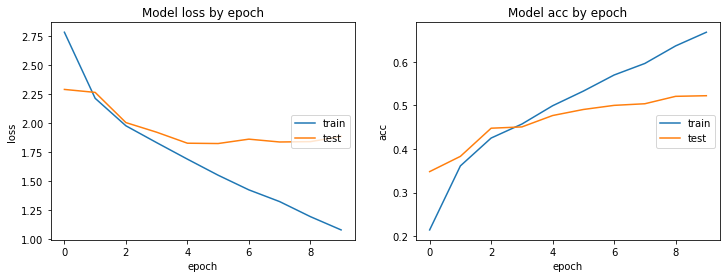

In [14]:
import matplotlib.pyplot as plt # Pour l'affichage d'images

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

## Matrice de confusion

In [19]:
model.load_weights(model_path + filename + '.hdf5')

In [20]:
y_pred_prob = model.predict(test_set)

In [21]:
fit_labels = dict((v,k) for k,v in (train_set.class_indices).items())

y_pred = [fit_labels[i] for i in np.argmax(y_pred_prob, axis=1)]

y_test = y_test.tolist()

In [18]:
from sklearn.metrics import f1_score, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          10       0.42      0.37      0.39       612
        1140       0.50      0.54      0.52       539
        1160       0.82      0.88      0.85       786
        1180       0.44      0.05      0.09       146
        1280       0.36      0.29      0.32       961
        1281       0.23      0.13      0.16       424
        1300       0.58      0.52      0.54       974
        1301       0.52      0.28      0.36       169
        1302       0.28      0.27      0.27       507
        1320       0.31      0.39      0.34       672
        1560       0.54      0.48      0.50      1013
        1920       0.75      0.74      0.75       841
        1940       0.42      0.42      0.42       137
        2060       0.37      0.48      0.42      1029
        2220       0.43      0.19      0.26       170
        2280       0.59      0.71      0.65       942
        2403       0.64      0.53      0.58       986
        2462       0.45    

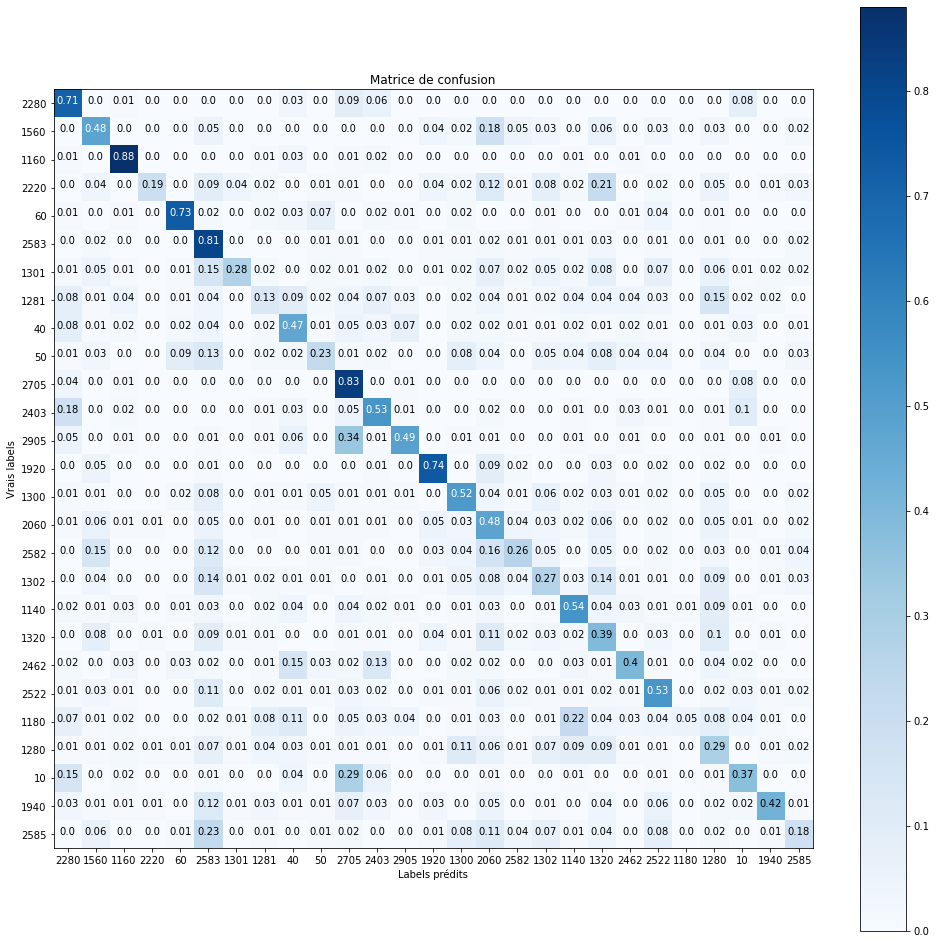

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline
import itertools # Pour créer des iterateurs


#Réponse valable:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred,labels=list(set(y_pred)))

pond_matrix = []
for line in cnf_matrix:
    pond_line = []
    for cell in line:
        pond_line.append(round(cell/sum(line),2))
    pond_matrix.append(pond_line)
    #print(sum(line))
    #print(sum(pond_line))
cnf_matrix = np.array(pond_matrix)

###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
#classes = range(0,26)
classes = set(y_pred)

plt.figure(figsize=(17,17))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
#tick_marks = set(y_test)
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

## Montrer erreurs

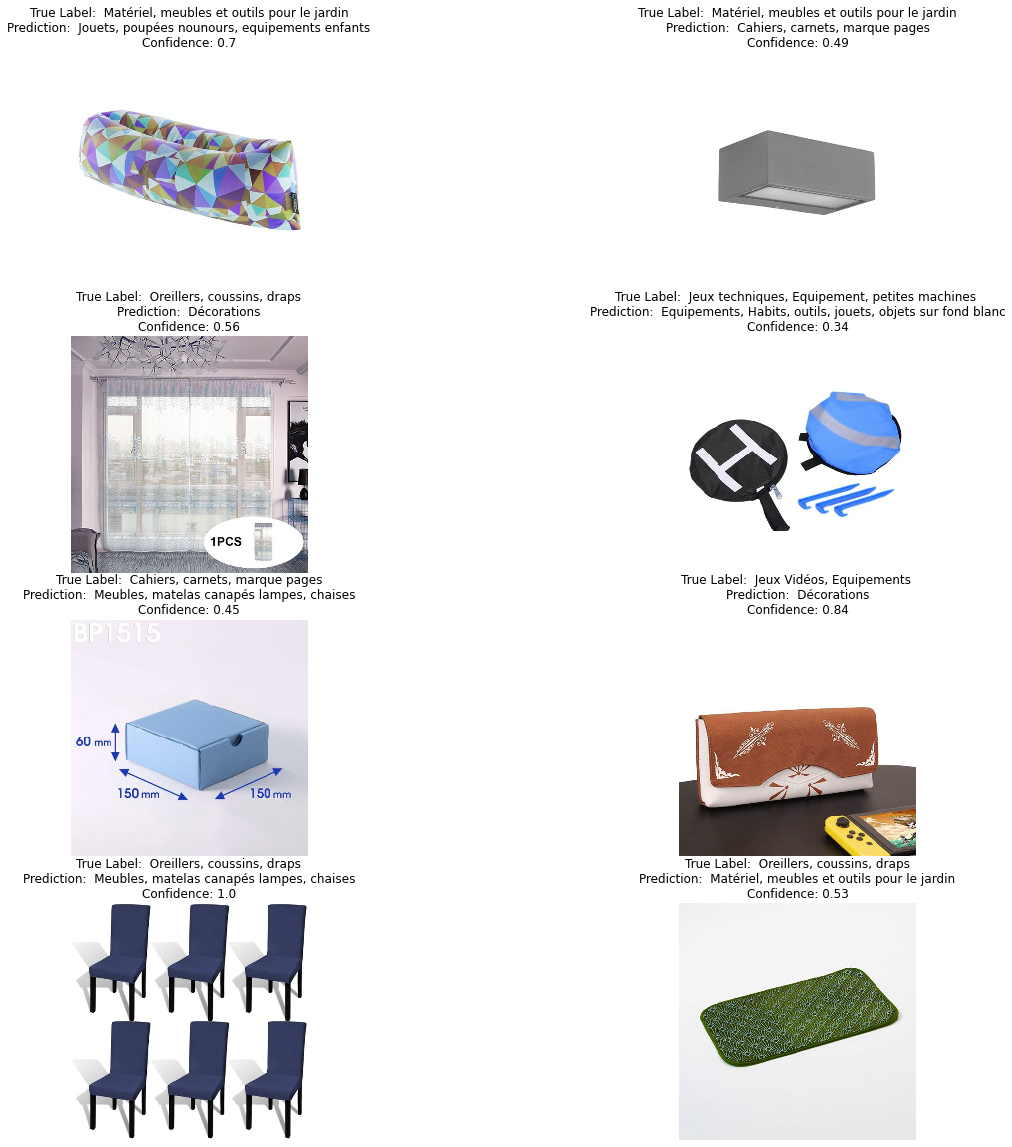

In [31]:
import cv2 #import OpenCV
import matplotlib.pyplot as plt # Pour l'affichage d'images
import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline

error_indexes = []
for i in range(len(y_pred)):
    if (y_pred[i] != y_test[i]):
        error_indexes += [i]

images = 8
        
j = 1

plt.figure(figsize = (20,20))
#plt.subplot(10,5,1)
plt.axis('off')

for i in np.random.choice(error_indexes, size = images):
    img = cv2.imread(path + '\\' + X_test_img.iloc[i]['image_name'])
    img = cv2.resize(img, (240, 240), interpolation=cv2.INTER_CUBIC)
    #img = cv2.imread(path + '\\' + X_test_img.iloc[0]['image_name'], cv2.IMREAD_COLOR)
    #img = img.reshape(28, 28)
    
    #plt.figure(figsize=(5,10))
    
    plt.subplot(4,2,j)
    
    #plt.subplot(5, 5, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img, cmap=cm.binary, interpolation='None')
    plt.title('True Label: ' + classes[str(y_test[i])] \
              + '\n' + 'Prediction: '+ classes[str(y_pred[i])] \
              + '\n' + 'Confidence: '+ str(round(np.max(y_pred_prob, axis=1)[i],2)))

## Features extraction

In [ ]:
from keras.models import Model

from sklearn.svm import SVC
intermediate_layer_model = Model(model.input, model.layers[2].output)

X_train_features = intermediate_layer_model.predict(train_set)


In [ ]:
X_test_features = intermediate_layer_model.predict(test_set)

In [ ]:
svm = SVC(C=100)

svm.fit(X_train_features, data_train["class"])

In [ ]:
svm.score(X_test_features,data_test["class"])